In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_excel("/content/annual data.xlsx")

In [0]:
weather_data.head(2)

,Year,Avg Temp,Avg NDVI,Avg snow cover
0,2001,283.1725,14225.59,4099.835
1,2002,281.9175,15296.26,4405.566


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Year              17 non-null int64
Avg Temp          17 non-null float64
Avg NDVI          17 non-null float64
Avg snow cover    17 non-null float64
dtypes: float64(3), int64(1)
memory usage: 624.0 bytes


In [0]:
input_feature= weather_data.iloc[:,[2,3]].values
input_data = input_feature

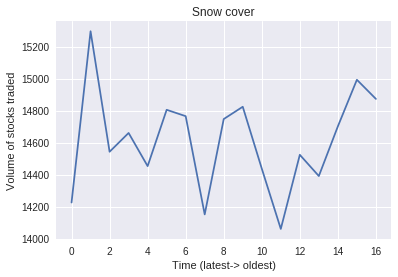

In [0]:
plt.plot(input_feature[:,0])
plt.title("Vegetation")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

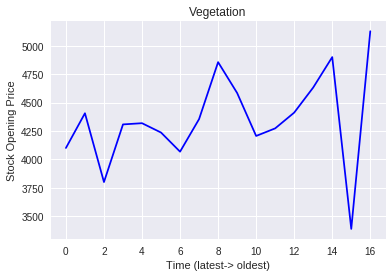

In [0]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Snow cover")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 5
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,0])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(12, 5, 2)
(5, 5, 2)


In [0]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [0]:
model = Sequential()
model.add(LSTM(units=105, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=105, return_sequences=True))
model.add(LSTM(units=105))
model.add(Dense(units=1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 5, 105)            45360     
_________________________________________________________________
lstm_26 (LSTM)               (None, 5, 105)            88620     
_________________________________________________________________
lstm_27 (LSTM)               (None, 105)               88620     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 106       
Total params: 222,706
Trainable params: 222,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(X, y, epochs=100, batch_size=1)


In [0]:
predicted_value= model.predict(X_test)


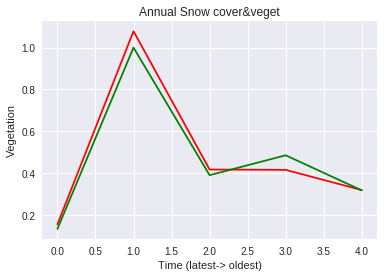

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:5,0], color='green')
plt.title("Annual Snow cover&veget")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Vegetation")
plt.show()

In [0]:
predicted_value

array([[0.1551371 ],
       [1.0781369 ],
       [0.41739622],
       [0.41574666],
       [0.3190396 ]], dtype=float32)

In [0]:
input_data[:5,0]

array([0.13358689, 1.        , 0.39038641, 0.48542181, 0.31764515])

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.r2_score(input_data[:5,0], predicted_value, sample_weight=None, multioutput='uniform_average')

0.9713139715331752

In [0]:
rmse_test=np.sqrt(np.mean(np.power((np.array(input_data[:5,0])-np.array(predicted_value)),2)))
print(rmse_test)

0.4293381749253894
